<a href="https://colab.research.google.com/github/likhith-t-25/human-activity-recognition/blob/main/p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your sensor data CSV file 


Saving sample_har_gyroscope.csv to sample_har_gyroscope (1).csv

 File 'sample_har_gyroscope (1).csv' uploaded and loaded successfully!
Shape of dataset: (100, 4)


<ipython-input-3-57c86aa8754c>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-3-57c86aa8754c>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Accuracy: 40.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      0.40      0.36         5
           2       0.75      0.60      0.67         5
           3       0.30      0.50      0.38         6

    accuracy                           0.40        20
   macro avg       0.35      0.38      0.35        20
weighted avg       0.36      0.40      0.37        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


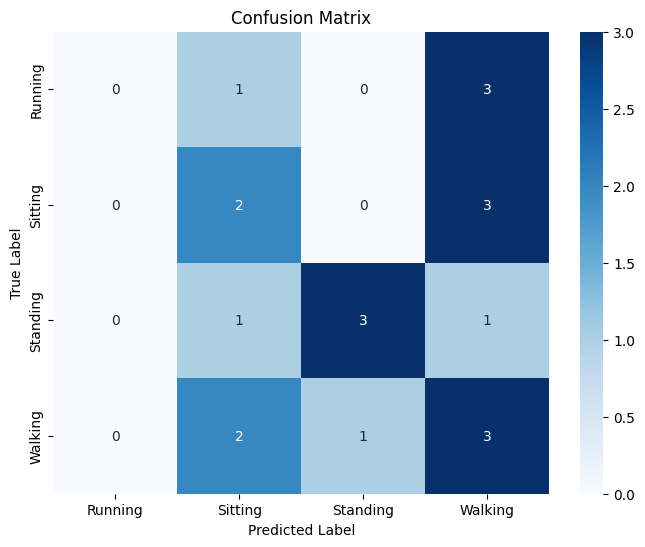

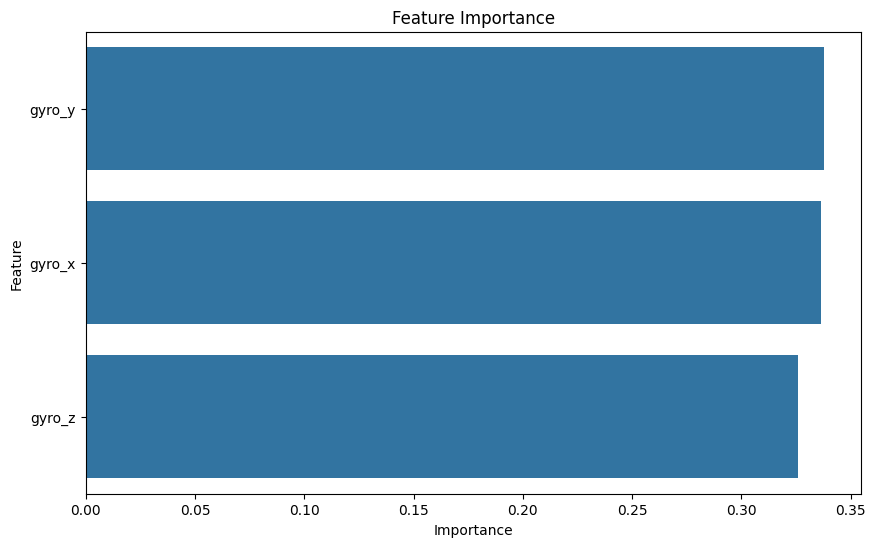

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
print("Please upload your sensor data CSV file ")
uploaded = files.upload()
for fn in uploaded.keys():
    filename = fn
try:
    df = pd.read_csv(filename)
    print(f"\n File '{filename}' uploaded and loaded successfully!")
    print(f"Shape of dataset: {df.shape}")
except Exception as e:
    print(f"Error loading file: {e}")
    raise SystemExit
activity_column = None
for col in df.columns:
    if 'activity' in col.lower():
        activity_column = col
        break
if activity_column is None:
    print("\n Error: 'Activity' or similar column not found. Please ensure your CSV has a label column (e.g., 'Activity', 'activity', 'label').")
    raise SystemExit
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)
X = df.drop(activity_column, axis=1)
y = df[activity_column]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.show()